In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os
import sys 

project_dir_path = '/home/onoue/ws/lukasiewicz_1'
project_dir_path = '/Users/keisukeonoue/ws/lukasiewicz_1'
sys.path.append(project_dir_path)

import cvxpy as cp 
import numpy as np 
import pandas as pd 

from src.setup_problem_dual import Setup
# from src.setup_problem_dual import ObjectiveFunction
# from src.setup_problem_dual import Predicate_dual

# from src.objective_function import ObjectiveFunction
# from src.objective_function_old import ObjectiveFunction
from src.objective_function_old_2 import ObjectiveFunction
from src.predicate import Predicate_dual

In [5]:
data_dir_path = "./../inputs/toy_data"

file_names_dict = {
    'supervised': ['L_p1.csv', 'L_p2.csv', 'L_p3.csv'],
    'unsupervised': ['U.csv'],
    'rule': ['rules.txt']
}

problem_instance = Setup(data_dir_path, file_names_dict, ObjectiveFunction, c1=10, c2=10)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.005451202392578125 seconds!
load_rules took 0.0006682872772216797 seconds!
formulate_predicates_with_cvxpy took 0.00016379356384277344 seconds!
_construct_P_j took 0.005383968353271484 seconds!
_construct_P_j took 0.005035877227783203 seconds!
_construct_P_j took 0.00462794303894043 seconds!
construct_constraints took 0.012685060501098633 seconds!
                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Jan 12 03:16:45 PM: Your problem has 96 variables, 135 constraints, and 0 parameters.
(CVXPY) Jan 12 03:16:45 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 12 03:16:45 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 12 03:16:45 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-----------------------------------

# 切片 $b_j$ の値の調整ができていない気がする 

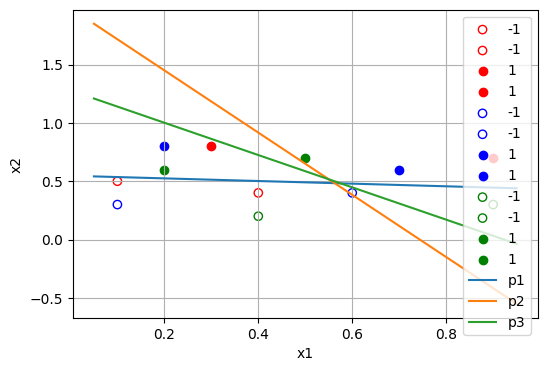

In [6]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(6,4))

p1 = Predicate_dual(problem_instance, 'p1')
p2 = Predicate_dual(problem_instance, 'p2')
p3 = Predicate_dual(problem_instance, 'p3')



ps = [p1, p2, p3]

test_x = np.linspace(0.05, 0.95, 100).reshape(-1, 1)
test_ys = []

for p in ps:
    w1 = p.coeff[0]
    w2 = p.coeff[1]
    b  = p.coeff[2]

    x = np.hstack([test_x, np.ones_like(test_x)])
    w = np.array([-w1/w2, -b/w2 + 0.5/w2]).reshape(-1,1)

    test_ys.append(x @ w)


colors = ['red', 'blue', 'green']


for p, c in zip(ps, colors):
    for l in range(4):
        if p.L[l, -1] == 1:
            plt.scatter(p.L[l, 0], p.L[l, 1], c=c, marker='o', label='1')
        else:
            plt.scatter(p.L[l, 0], p.L[l, 1], facecolors='none', edgecolors=c, marker='o', label='-1')
        
for j, test_y in enumerate(test_ys):
    plt.plot(test_x, test_y, label=f'p{j+1}')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
p1 = Predicate_dual(problem_instance, 'p1')
# X = problem_instance.L['p1'][:, :-1]
# Y = problem_instance.L['p1'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p1(x))

p2 = Predicate_dual(problem_instance, 'p2')
# X = problem_instance.L['p2'][:, :-1]
# Y = problem_instance.L['p2'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p2(x))

p3 = Predicate_dual(problem_instance, 'p3')
# X = problem_instance.L['p3'][:, :-1]
# Y = problem_instance.L['p3'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p3(x))

print(f'p1: {p1.coeff}')
print(f'p2: {p2.coeff}')
print(f'p3: {p3.coeff}')

print(- p1.coeff[2] / p1.coeff[1] + 0.5 / p1.coeff[1])
print(- p2.coeff[2] / p2.coeff[1] + 0.5 / p2.coeff[1])
print(- p3.coeff[2] / p3.coeff[1] + 0.5 / p3.coeff[1])

p1: [ 0.74999529  1.99998975 -1.01874184]
p2: [-35.30163754 -24.13922316  26.27943897]
p3: [-71.999874   -51.99989429  60.49988719]
0.7593748158231226
1.0679481604713514
1.1538463300762016


In [7]:
p1 = Predicate_dual(problem_instance, 'p1')
# X = problem_instance.L['p1'][:, :-1]
# Y = problem_instance.L['p1'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p1(x))

p2 = Predicate_dual(problem_instance, 'p2')
# X = problem_instance.L['p2'][:, :-1]
# Y = problem_instance.L['p2'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p2(x))

p3 = Predicate_dual(problem_instance, 'p3')
# X = problem_instance.L['p3'][:, :-1]
# Y = problem_instance.L['p3'][:, -1]
# for x, y in zip(X, Y):
#     print(x, y, p3(x))

print(f'p1: {p1.coeff}')
print(f'p2: {p2.coeff}')
print(f'p3: {p3.coeff}')

print(- p1.coeff[2] / p1.coeff[1] + 0.5 / p1.coeff[1])
print(- p2.coeff[2] / p2.coeff[1] + 0.5 / p2.coeff[1])
print(- p3.coeff[2] / p3.coeff[1] + 0.5 / p3.coeff[1])

p1: [ 1.64599155 14.54392469 -7.456264  ]
p2: [-31.99999978 -12.00000719  24.30000494]
p3: [-71.99984808 -51.99936977  66.96624952]
0.5470506873600542
1.9833325559449433
1.2782125978413794


# pima indian 

In [18]:
data_dir_path = os.path.join(project_dir_path, 'inputs/pima_indian_diabetes')
train_data_dir_path = os.path.join(data_dir_path, "train")
file_list = os.listdir(train_data_dir_path)

L_files = [filename for filename in file_list 
           if filename.startswith('L') and filename.endswith('.csv')]

U_files = [filename for filename in file_list 
           if filename.startswith('U') and filename.endswith('.csv')]

file_names_dict = {
    'supervised': L_files,
    'unsupervised': U_files,
    'rule': ['rules.txt']
}

In [19]:
problem_instance = Setup(train_data_dir_path, file_names_dict, ObjectiveFunction)
objective, constraints = problem_instance.main()

problem = cp.Problem(objective, constraints)
result = problem.solve(verbose=True)

load_data took 0.05187487602233887 seconds!
load_rules took 0.021090030670166016 seconds!
formulate_predicates_with_cvxpy took 0.0003490447998046875 seconds!
_construct_P_j took 76.84089016914368 seconds!
_construct_P_j took 77.10880208015442 seconds!
_construct_P_j took 74.1159770488739 seconds!
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/keisukeonoue/ws/lukasiewicz_1/myenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/s5/29r5x3qd5h30ntfm58ck0mx00000gn/T/ipykernel_88282/2565102516.py", line 2, in <module>
    objective, constraints = problem_instance.main()
                             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/keisukeonoue/ws/lukasiewicz_1/src/setup_problem_dual.py", line 238, in main
    objective_function = self.obj(self).construct()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/keisukeonoue/ws/lukasiewicz_1/src/objective_function.py", line 207, in construct
    x, P = self._construct_P_j(j, mapping_x_i, x)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/keisukeonoue/ws/lukasiewicz_1/src/misc.py", line 35, in wrapper
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/kei